1. What is Simple Linear Regression?
Ans: A simple linear Regresson is a machine learning algorithm used to develop a relation ship between a independent variable and one dependent variable.
the linear relationship is of a form
Y=mx+c, where m is the slope and c is the intercept of the line shows the relationship.
the goal is to find the optimal coefficients m and c in order to make line called best fit line.

2. What are the key assumptions of Simple Linear Regression?
Ans: The assumptions are:
Linearity – The relationship between X and Y is linear.
Independence – Observations are independent of each other.
Homoscedasticity – Variance of residuals is constant across all values of X.
Normality of residuals – Errors (residuals) follow a normal distribution.
No perfect multicollinearity – (Only one predictor in simple regression, so not an issue).
No autocorrelation – Especially important in time-series data.

3. What is heteroscedasticity, and why is it important to address in regression models?
Ans: Heteroscedasticity occurs when the variance of residuals (errors) is not constant across levels of the independent variable(s).i.e when X increases Variance increases.
It is important because it Violates the OLS assumption of homoscedasticity.

4. What is Multiple Linear Regression?
Ans: A multiple linear Regresson is a machine learning algorithm used to develop a relationship between two or more than two independent variable and one dependent variable.
the linear relationship is of a form
Y=c+m1x1+m2x2-----mnxn, where mi is the slope and c is the intercept of the line shows the relationship.
the goal is to find the optimal coefficients mi and ci in order to make line called best fit line.

5. What is polynomial regression, and how does it differ from linear regression?
Ans: Polynomial Regression is an extension of linear regression where the relationship between X and Y is modeled as an nth-degree polynomial.
equation is
Y=c+m1x+m2(x)^2------mn(x)^n



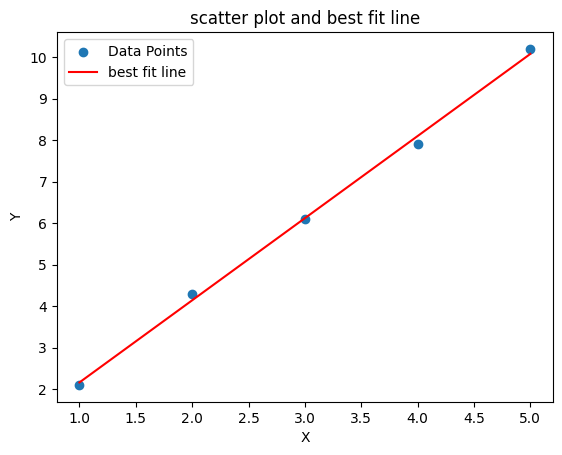

In [40]:
#6 Implement a Python program to fit a Simple Linear Regression model to the following sample data:
# X = [1, 2, 3, 4, 5]
# Y = [2.1, 4.3, 6.1, 7.9, 10.2]
#Plot the regression line over the data points.

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])
model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
plt.scatter(X, Y)
plt.title("scatter plot and best fit line")
plt.plot(X, y_pred, color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(['Data Points','best fit line'])
plt.show()


In [38]:
#7 Fit a Multiple Linear Regression model on this sample data:
#Area = [1200, 1500, 1800, 2000]
#Rooms = [2, 3, 3, 4]
#Price = [250000, 300000, 320000, 370000]
#Check for multicollinearity using VIF and report the results.

from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
Area=np.array([1200, 1500, 1800, 2000]).reshape(-1,1)
Rooms=np.array([2, 3, 3, 4]).reshape(-1,1)
Price=np.array([250000, 300000, 320000, 370000]).reshape(-1,1)
df=pd.DataFrame(np.hstack((Area,Rooms,Price)),columns=['Area','Rooms','Price'])
Vif=pd.DataFrame()
Vif['variables']=df.columns
Vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
print(f" vif of the values are \n\n{Vif}")
X=df[['Area','Rooms']]
Y=df['Price']
model=LinearRegression()
model.fit(X,Y)
y_pred=model.predict=(X)
 ## Observations are that the VIF of the Area and Rooms are 382.73 and 130.62


 vif of the values are 

  variables         VIF
0      Area  382.737616
1     Rooms  130.623835
2     Price  312.248651


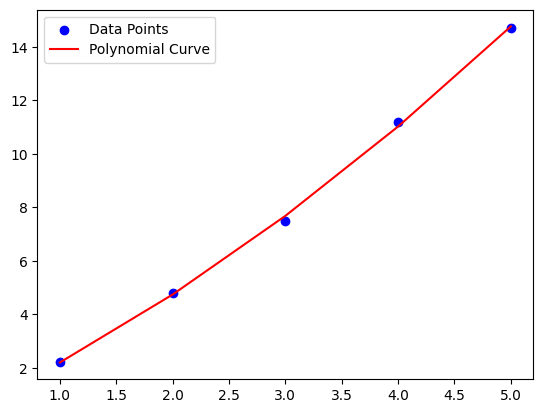

Coefficients: [0.   1.94 0.2 ]
Intercept: 0.06000000000000938


In [39]:
#8 Implement polynomial regression on the following data:
# X = [1, 2, 3, 4, 5] 3
# Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)
plt.scatter(X, Y, color='blue', label="Data Points")
plt.plot(X, Y_pred, color='red', label="Polynomial Curve")
plt.legend()
plt.show()
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


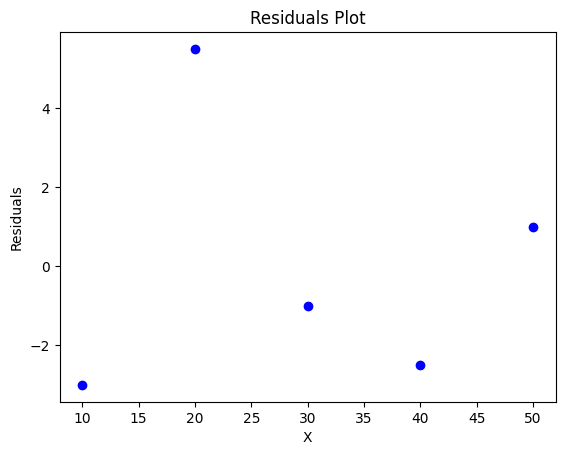

In [42]:
#9  Create a residuals plot for a regression model trained on this data:
# X = [10, 20, 30, 40, 50]
# Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.

X = np.array([10, 20, 30, 40, 50]).reshape(-1,1)
Y = np.array([15, 35, 40, 50, 65])
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
residuals = Y - Y_pred
plt.scatter(X, residuals, color='blue')
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

## If residuals spread unevenly, heteroscedasticity exists i.e. here eteroscedasticity doesn't exists


10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
Ans: For Heteroscedasticity:
Generally i Apply log transformation or Box-Cox transformation to the target variable also i can Use Weighted Least Squares (WLS).
For Multicollinearity:
first Calculate the VIF for predictors.then Remove highly correlated features
also Use Principal Component Analysis (PCA) or Regularization methods (Ridge, Lasso).
